In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install mediapipe pyglet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 184 kB/s 


In [ ]:
pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Handedness: [classification {
  index: 1
  score: 0.9264451265335083
  label: "Right"
}
, classification {
  index: 1
  score: 0.9907867908477783
  label: "Right"
}
]
hand_landmarks: landmark {
  x: 0.7870746850967407
  y: 0.8133820295333862
  z: 6.421378202503547e-07
}
landmark {
  x: 0.6901037096977234
  y: 0.7607929706573486
  z: -0.044777221977710724
}
landmark {
  x: 0.6101969480514526
  y: 0.6642093062400818
  z: -0.06839102506637573
}
landmark {
  x: 0.5637145042419434
  y: 0.563397228717804
  z: -0.08764824271202087
}
landmark {
  x: 0.5647133588790894
  y: 0.4709049463272095
  z: -0.10423824936151505
}
landmark {
  x: 0.6983803510665894
  y: 0.4521774351596832
  z: -0.028965463861823082
}
landmark {
  x: 0.6836915612220764
  y: 0.30063730478286743
  z: -0.056450989097356796
}
landmark {
  x: 0.6783794164657593
  y: 0.20952744781970978
  z: -0.08171861618757248
}
landmark {
  x: 0.6782076358795166
  y: 0.12967410683631897
  z: -0.10085500031709671
}
landmark {
  x: 0.7571159601

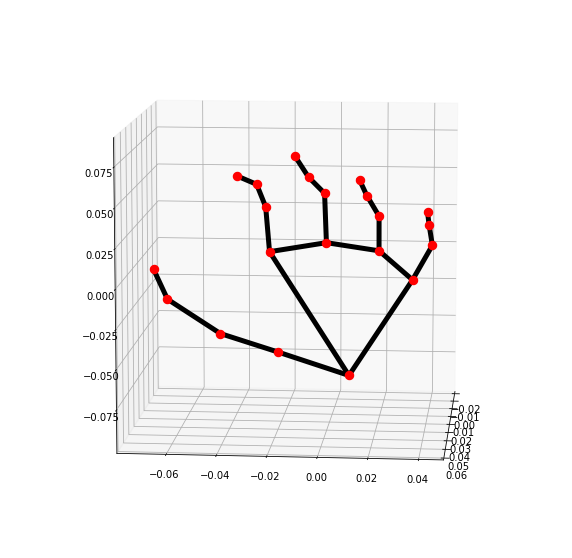

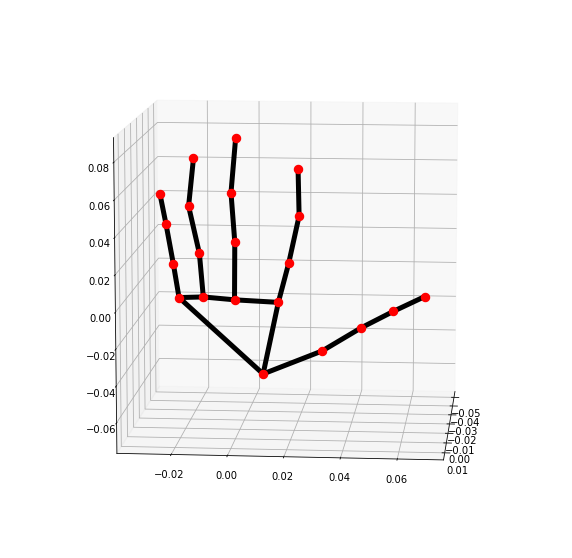

In [ ]:
# https://google.github.io/mediapipe/solutions/hands
import cv2
import mediapipe as mp
import os
import urllib.request

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# download image as hands.jpg
url = 'http://apmonitor.com/pds/uploads/Main/hands.jpg'
urllib.request.urlretrieve(url, 'hands.jpg')
IMAGE_FILES = ['hands.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.flip(cv2.imread(file), 1)

    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, \
                            cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      tip = mp_hands.HandLandmark.INDEX_FINGER_TIP
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[tip].x * image_width}, '
          f'{hand_landmarks.landmark[tip].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite('annotated_image' + str(idx) + '.png', \
                cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, \
        mp_hands.HAND_CONNECTIONS, azimuth=5)